In [2]:
import pandas as pd

df = pd.read_csv("IMDb_2024_Merged.csv")

In [6]:
import pandas as pd
import ast

df = pd.read_csv("IMDb_2024_Merged.csv")
def safe_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else []
    except:
        return []

df['GenreMain'] = df['GenreMain'].apply(safe_eval)


In [7]:
print(df['GenreMain'].head(10))

0    []
1    []
2    []
3    []
4    []
5    []
6    []
7    []
8    []
9    []
Name: GenreMain, dtype: object


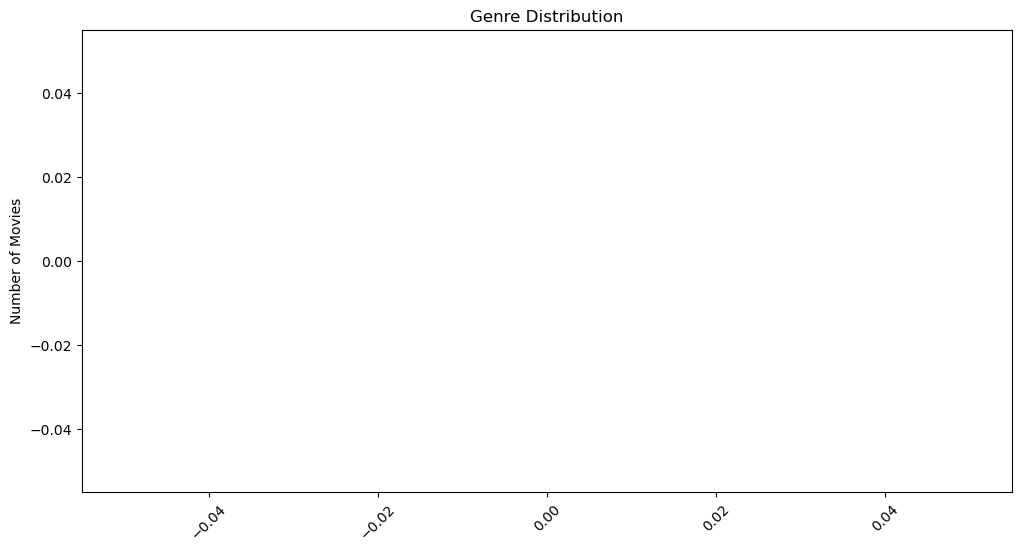

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

genre_counts = Counter([genre for genres in df['GenreMain'] for genre in genres])
plt.figure(figsize=(12,6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title("Genre Distribution")
plt.ylabel("Number of Movies")
plt.show()

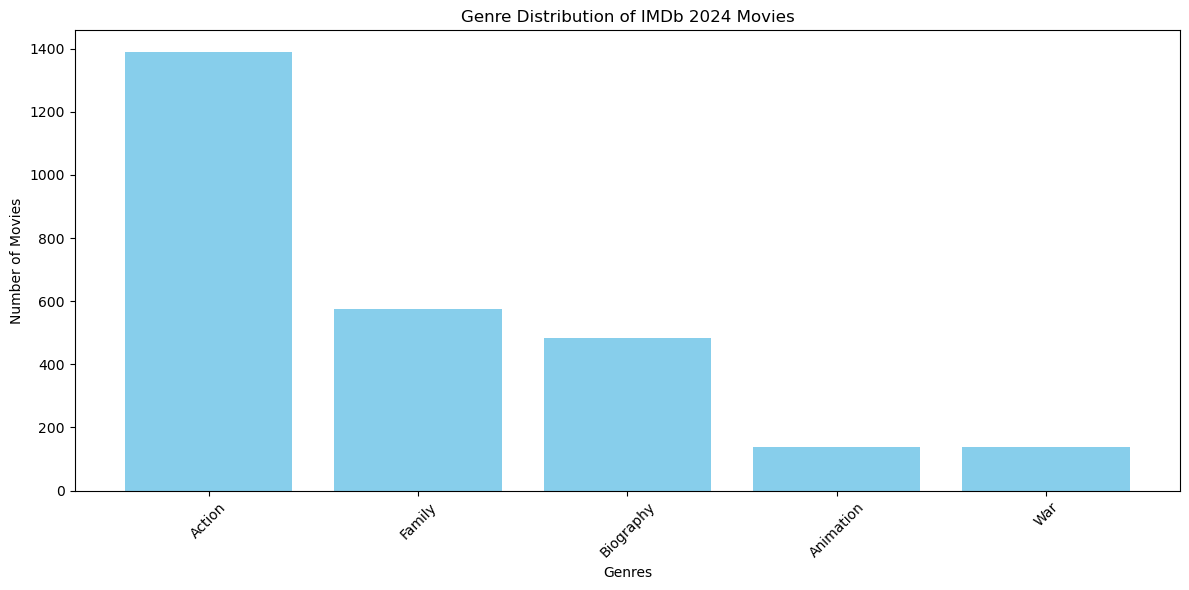

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load your dataset
df = pd.read_csv("IMDb_2024_Merged.csv")

# Drop rows with missing genres
df = df[df['GenreMain'].notna()]

# Count genre frequencies
genre_counts = df['GenreMain'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.title("Genre Distribution of IMDb 2024 Movies")
plt.ylabel("Number of Movies")
plt.xlabel("Genres")
plt.tight_layout()
plt.show()

In [10]:
####################. Top 10 Highest Rated Movies################################

top_rated = df.sort_values(by='Rating', ascending=False).head(10)
print(top_rated[['Title', 'Rating', 'Votes', 'GenreMain']])

                               Title  Rating Votes  GenreMain
925                926. La Chakalosa    10.0    -5     Action
1048             1049. Falsos Amigos    10.0    -5     Action
1036  1037. Herencia Llena De Sangre    10.0    -5     Action
1827         300. Not Taken: Origins     9.8    -7  Biography
531          532. Azotes de Barrio 2     9.8   -13     Action
1130                     1131. Samar     9.7   -21     Action
1090            1091. Banana Shotgun     9.7    -6     Action
969              970. The End of Hen     9.7   -10     Action
1818                     291. Sunita     9.6    -6  Biography
1840           313. It'll Never Work     9.6   -30  Biography


In [11]:
##########################Top 10 Most Voted Movies#######################################
most_voted = df.sort_values(by='Votes', ascending=False).head(10)
print(most_voted[['Title', 'Rating', 'Votes', 'GenreMain']])

                                     Title  Rating Votes  GenreMain
580                     581. Sentimentaaal     4.9  -991     Action
1574                            47. Harbin     6.2  -991  Biography
2123                 112. A Nashville Wish     5.6   -99     Family
2147                           136. Skelly     5.5   -99     Family
2394                    383. Neposlushniki     4.8   -99     Family
166                            167. Harbin     6.2  -987     Action
2126                          115. Grrr...     4.0  -987     Family
234   235. Mobile Suit Gundam SEED Freedom     6.6  -984     Action
148            149. Everybody Loves Jenifa     8.3   -98     Action
2214      203. The Secret of Pin-Up Island     7.3   -98     Family


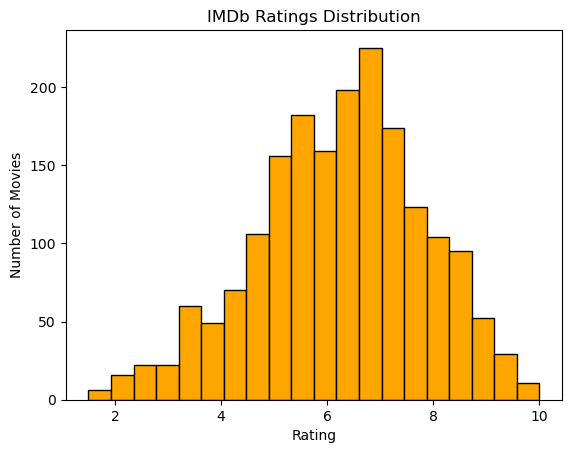

In [14]:
###############Ratings Distribution Histogram############################
plt.hist(df['Rating'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title("IMDb Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.show()

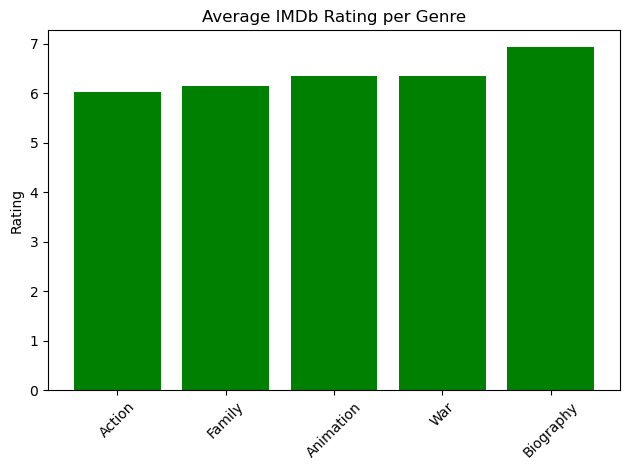

In [15]:
########################## Genre-wise Rating Comparison (Bar Plot)#############################
genre_avg_ratings = df.groupby('GenreMain')['Rating'].mean().sort_values()
plt.bar(genre_avg_ratings.index, genre_avg_ratings.values, color='green')
plt.title("Average IMDb Rating per Genre")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()